In [16]:
# =========================
# 0️⃣ Imports
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set style for plots
sns.set(style="whitegrid")


In [17]:
# =========================
# 1️⃣ Load Dataset
# =========================
df = pd.read_csv("../data/churn_raw.csv")

# Quick view
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Check data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# Summary statistics
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
# =========================
# 2️⃣ Check for missing values
# =========================
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# =========================
# 3️⃣ Convert TotalCharges to numeric
# =========================
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify
df['TotalCharges'].dtype
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

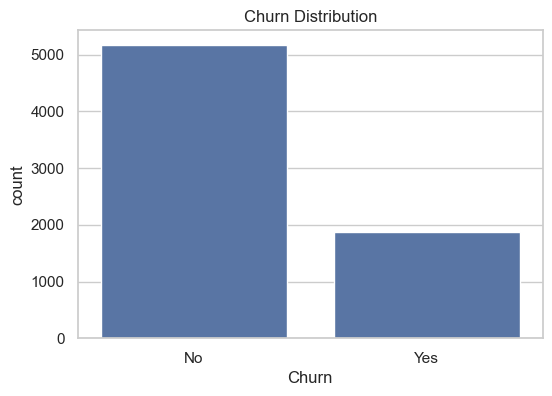

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [22]:
# =========================
# 4️⃣ Churn distribution
# =========================
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Percentage of churned customers
df['Churn'].value_counts(normalize=True) * 100


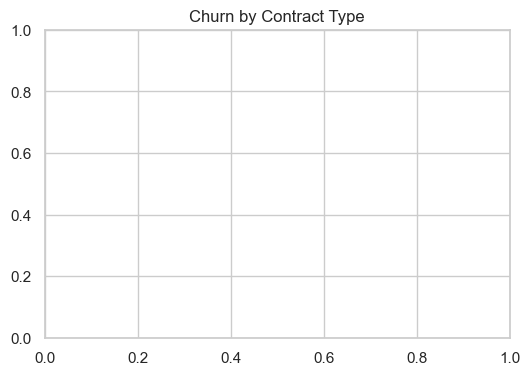

In [23]:
# =========================
# 5️⃣ Exploratory Data Analysis (EDA)
# =========================

# 5.1 Churn by Contract
contract_cols = [col for col in df.columns if col.startswith('Contract_')]
contract_churn = df.melt(
    id_vars='Churn', 
    value_vars=contract_cols, 
    var_name='Contract', 
    value_name='HasContract'
)
contract_churn = contract_churn[contract_churn['HasContract'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=contract_churn)
plt.title('Churn by Contract Type')
plt.show()


In [24]:
# 5.2 Churn by Tenure Groups
tenure_cols = [col for col in df.columns if col.startswith('tenure_group_')]

for col in tenure_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.show()


In [25]:
# 5.2 Churn by Tenure Groups
tenure_cols = [col for col in df.columns if col.startswith('tenure_group_')]

for col in tenure_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.show()


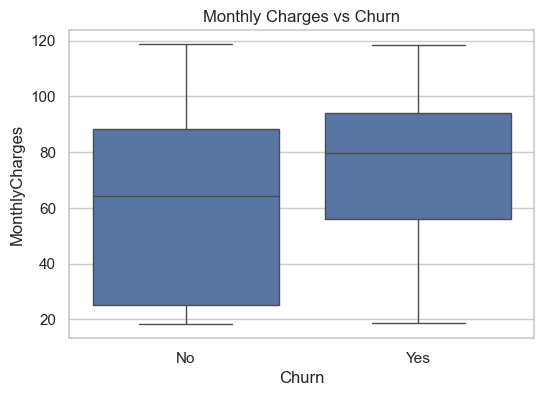

In [26]:
# 5.3 Churn vs Monthly Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


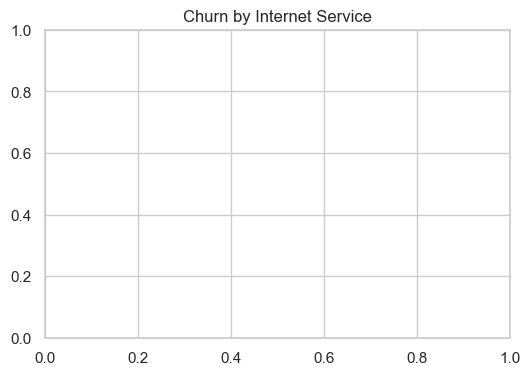

In [27]:
# 5.4 Churn by Internet Service
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]
internet_churn = df.melt(
    id_vars='Churn',
    value_vars=internet_cols,
    var_name='InternetService',
    value_name='HasService'
)
internet_churn = internet_churn[internet_churn['HasService'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=internet_churn)
plt.title('Churn by Internet Service')
plt.show()


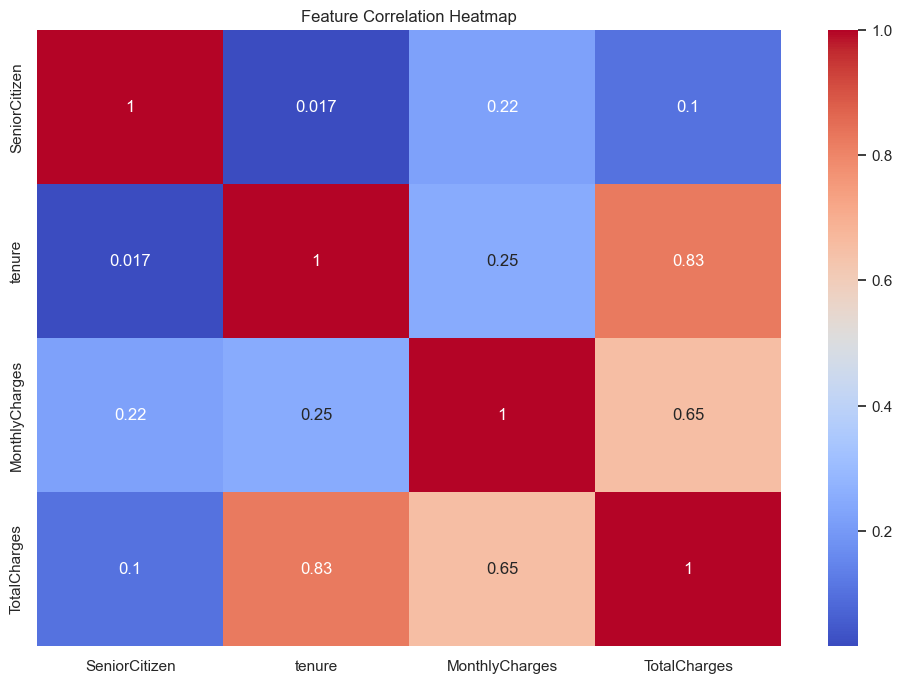

In [30]:
# 5.5 Correlation Heatmap - only numeric columns
plt.figure(figsize=(12,8))

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Training set shape: (5634, 30)
Test set shape: (1409, 30)
Target distribution in train set:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Accuracy: 0.7863733144073811

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.79      0.78      1409

ROC-AUC Score: 0.8250807305794517


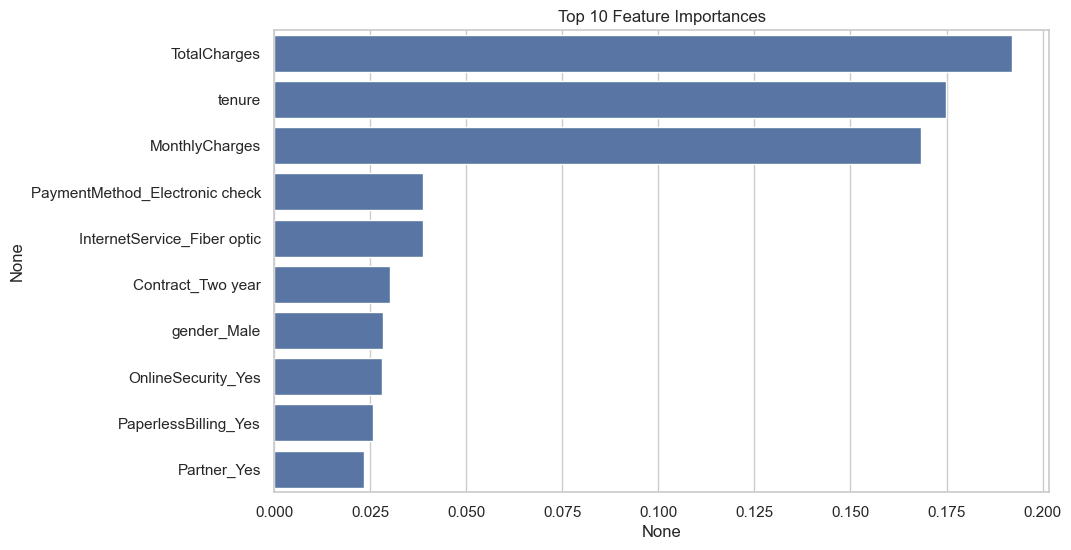

In [34]:
# =========================
# 1️⃣ Imports
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# =========================
# 2️⃣ Load Data
# =========================
df = pd.read_csv("../data/churn_raw.csv")

# =========================
# 3️⃣ Preprocessing
# =========================
# Convert 'TotalCharges' to numeric (sometimes it has spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing target
df = df.dropna(subset=['Churn'])

# Fill numeric NaNs if any
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode target
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

# One-hot encode categorical variables (excluding customerID)
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'customerID']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# =========================
# 4️⃣ Train-Test Split
# =========================
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in train set:\n", y_train.value_counts(normalize=True))

# =========================
# 5️⃣ Train Random Forest Classifier
# =========================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

# =========================
# 6️⃣ Evaluation
# =========================
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

# =========================
# 7️⃣ Feature Importance
# =========================
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


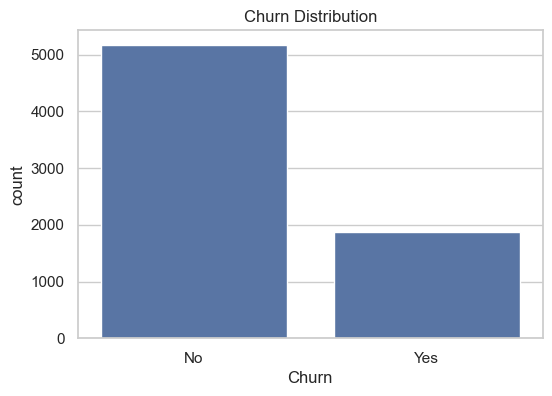

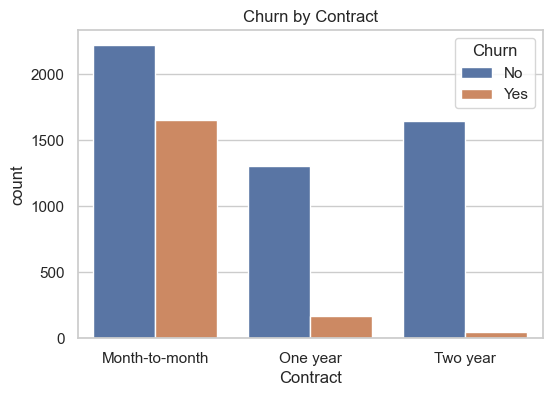

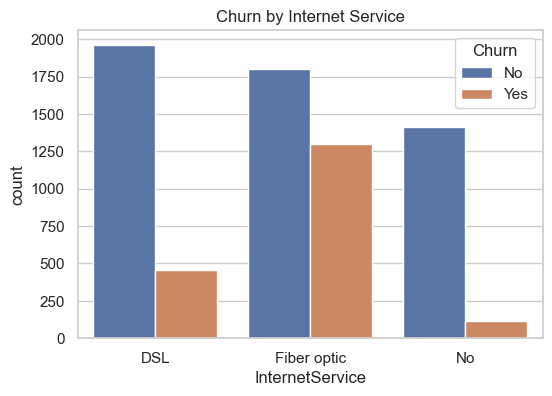

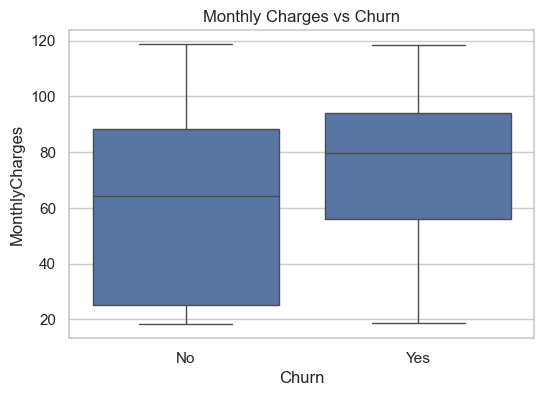

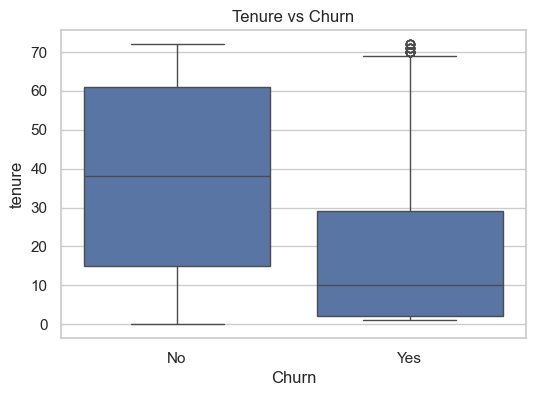

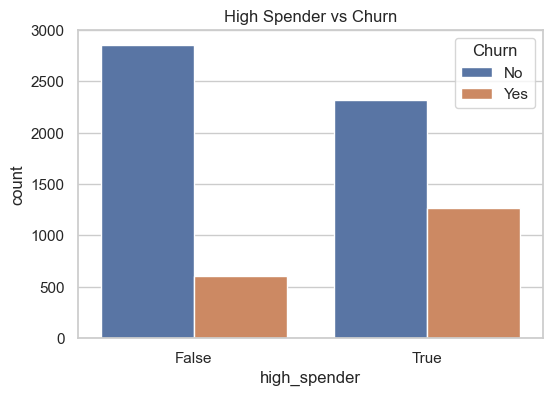

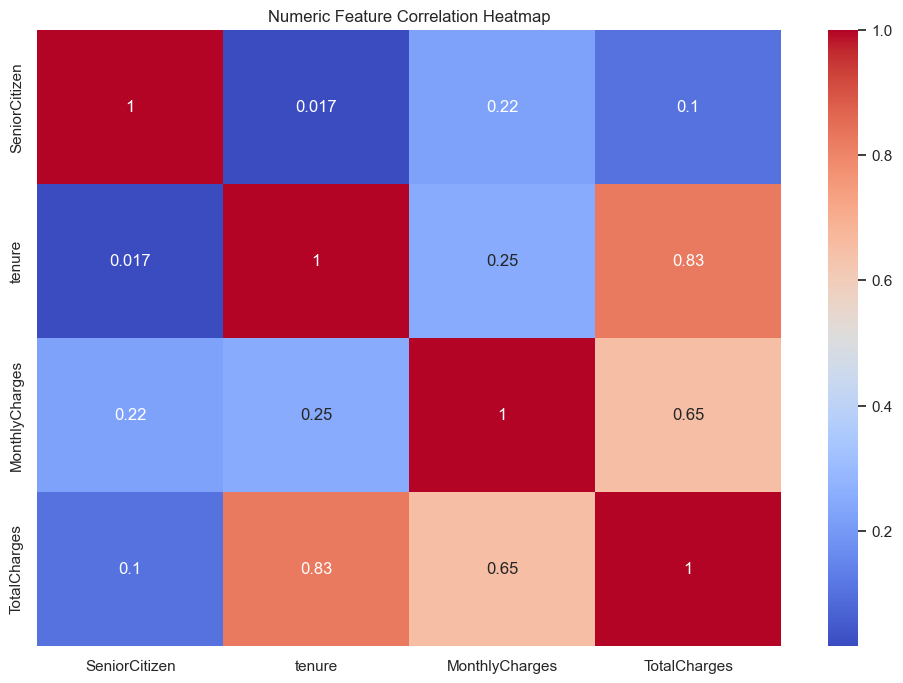

Shape after one-hot encoding: (7043, 32)
X_train shape: (5634, 31)
X_test shape: (1409, 31)
Target distribution in train set:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Accuracy: 0.7899219304471257
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8230256529489267


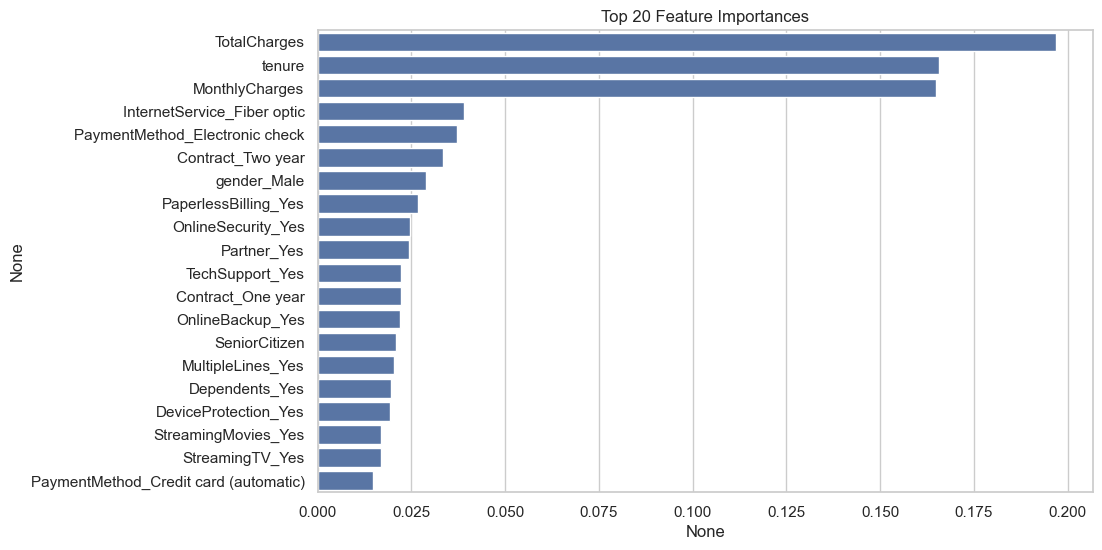

In [36]:
# =========================
# 0️⃣ Imports
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# =========================
# 1️⃣ Load Dataset
# =========================
df = pd.read_csv(r"C:\Users\Anjal\churn-analysis\data\churn_raw.csv")

# Fix TotalCharges: convert to numeric, handle missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# =========================
# 2️⃣ Quick Overview
# =========================
print(df.info())
print(df.describe())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nChurn % distribution:\n", df['Churn'].value_counts(normalize=True) * 100)

# =========================
# 3️⃣ EDA - Visualizations
# =========================
sns.set(style="whitegrid")

# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Churn by Contract
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract')
plt.show()

# Churn by Internet Service
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

# MonthlyCharges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# High Spender Flag
df['high_spender'] = df['MonthlyCharges'] > 70
plt.figure(figsize=(6,4))
sns.countplot(x='high_spender', hue='Churn', data=df)
plt.title('High Spender vs Churn')
plt.show()

# Numeric feature correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

# =========================
# 4️⃣ Preprocessing - Encode Categorical Variables
# =========================

# Drop customerID (not useful)
df = df.drop('customerID', axis=1)

# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# One-hot encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape after one-hot encoding:", df.shape)

# =========================
# 5️⃣ Train/Test Split
# =========================
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Target distribution in train set:\n", y_train.value_counts(normalize=True))

# =========================
# 6️⃣ Model Training & Evaluation
# =========================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

# =========================
# 7️⃣ Feature Importance
# =========================
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)[:20]  # Top 20 features

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Top 20 Feature Importances")
plt.show()


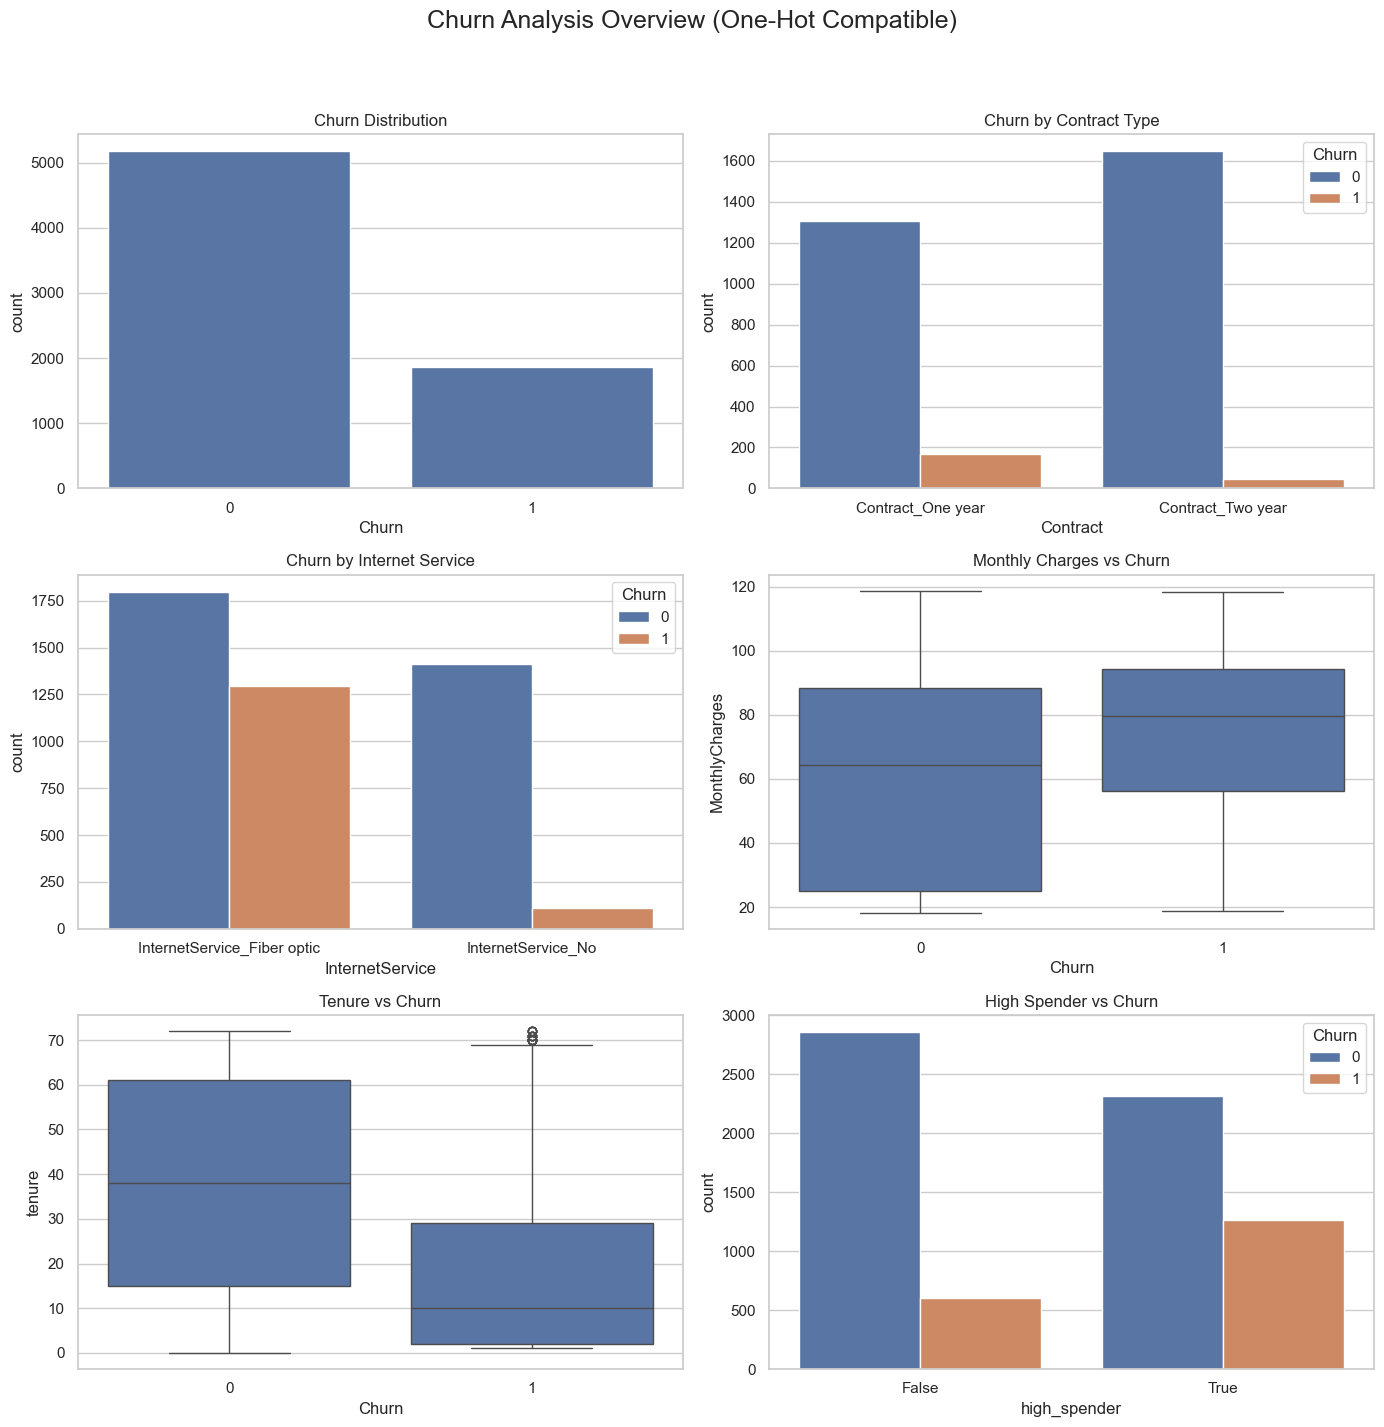

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid")

# Ensure high_spender exists
df['high_spender'] = df['MonthlyCharges'] > 70

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Churn Analysis Overview (One-Hot Compatible)', fontsize=18)

# 1️⃣ Churn Distribution
sns.countplot(x='Churn', data=df, ax=axes[0,0])
axes[0,0].set_title('Churn Distribution')

# 2️⃣ Churn by Contract (using one-hot)
contract_cols = ['Contract_One year', 'Contract_Two year']  # Month-to-month implied
contract_melt = df.melt(id_vars='Churn', value_vars=contract_cols,
                        var_name='Contract', value_name='HasContract')
contract_melt = contract_melt[contract_melt['HasContract']==1]
sns.countplot(x='Contract', hue='Churn', data=contract_melt, ax=axes[0,1])
axes[0,1].set_title('Churn by Contract Type')

# 3️⃣ Churn by Internet Service (one-hot)
internet_cols = ['InternetService_Fiber optic', 'InternetService_No']  # DSL implied
internet_melt = df.melt(id_vars='Churn', value_vars=internet_cols,
                        var_name='InternetService', value_name='HasService')
internet_melt = internet_melt[internet_melt['HasService']==1]
sns.countplot(x='InternetService', hue='Churn', data=internet_melt, ax=axes[1,0])
axes[1,0].set_title('Churn by Internet Service')

# 4️⃣ Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges vs Churn')

# 5️⃣ Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[2,0])
axes[2,0].set_title('Tenure vs Churn')

# 6️⃣ High Spender vs Churn
sns.countplot(x='high_spender', hue='Churn', data=df, ax=axes[2,1])
axes[2,1].set_title('High Spender vs Churn')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


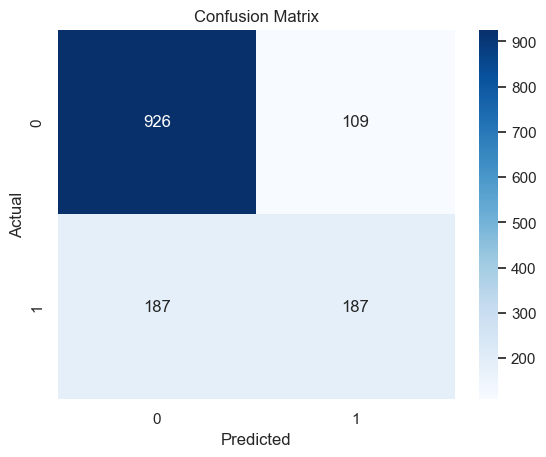

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


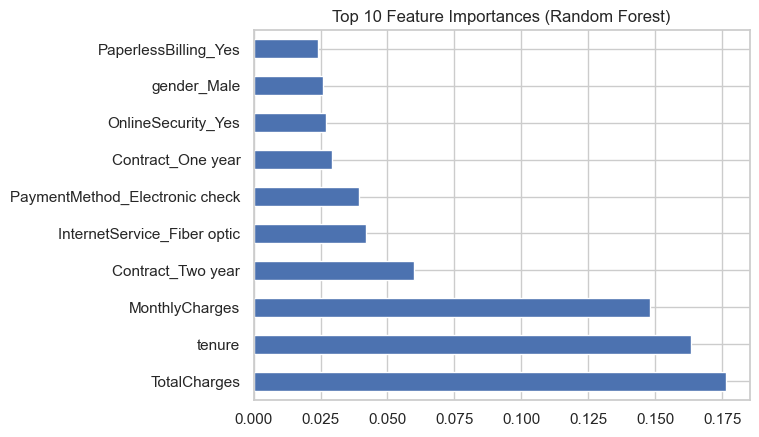

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()


In [42]:
import joblib
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]


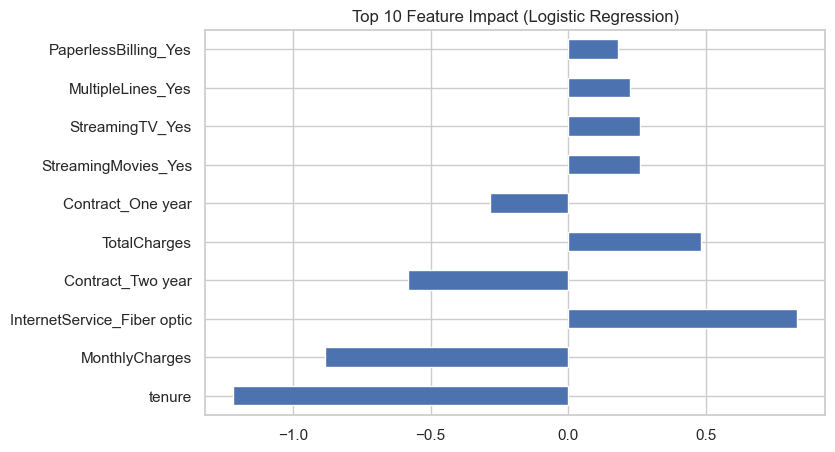

In [48]:
coef = pipeline.named_steps['logreg'].coef_.ravel()

feature_importance = pd.Series(coef, index=X_train.columns)
feature_importance = feature_importance.reindex(
    feature_importance.abs().sort_values(ascending=False).index
)

feature_importance.head(10).plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Feature Impact (Logistic Regression)')
plt.show()
